In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

## 1

### 1.1

In [2]:
def createData(alpha, beta, nu, n = 1000):
    ## n: number of data points
    ## alpha: amplitude (importance)
    ## beta: frequency (complexity)
    ## nu: noise
    np.random.seed(371)
    x1 = np.random.normal(size=n)
    x2 = np.random.normal(size=n)
    X = np.column_stack((x1, x2))  # design matrix

    ## Now compute color
    y = x2 > (alpha * np.sin(beta * x1) + nu * np.random.normal(size=n))
    ## this is how the data looks like
    return X, y

## And it will look something like this:
def plot_dataset(X, y, alpha, beta, nu):
    ax = plt.axes()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    ax.set_aspect("equal")
    ax.set_title(f"alpha = {alpha}, beta = {beta}, nu = {nu}")
    plt.show()

#### 1.1.a

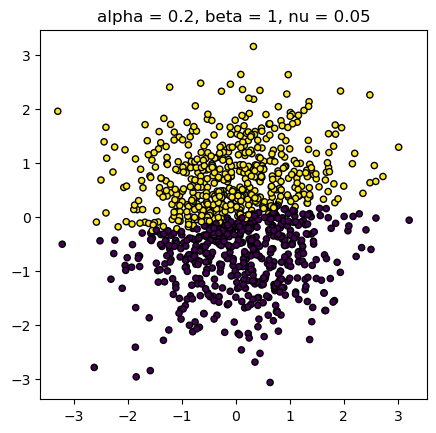

In [3]:
alpha, beta, nu = 0.2, 1, 0.05
X1, y1 = createData(alpha, beta, nu)
plot_dataset(X1, y1, alpha, beta, nu)

#### 1.1.b

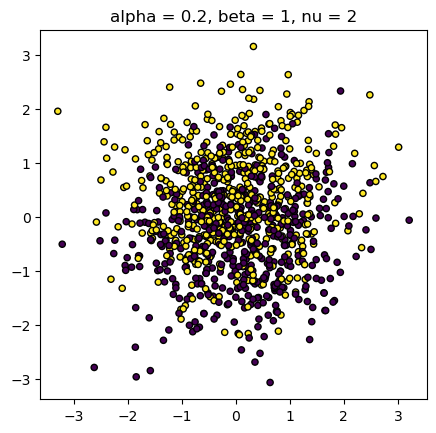

In [4]:
alpha, beta, nu = 0.2, 1, 2
X2, y2 = createData(alpha, beta, nu)
plot_dataset(X2, y2, alpha, beta, nu)

#### 1.c

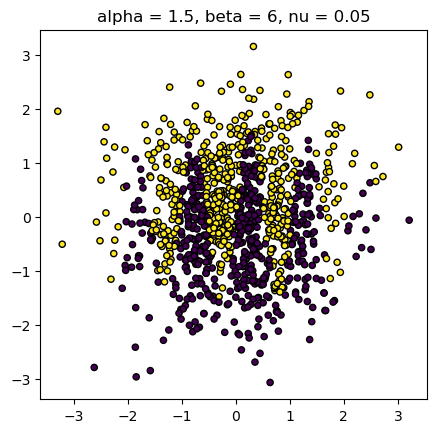

In [5]:
alpha, beta, nu = 1.5, 6, 0.05
X3, y3 = createData(alpha, beta, nu)
plot_dataset(X3, y3, alpha, beta, nu)

#### 1.1.d

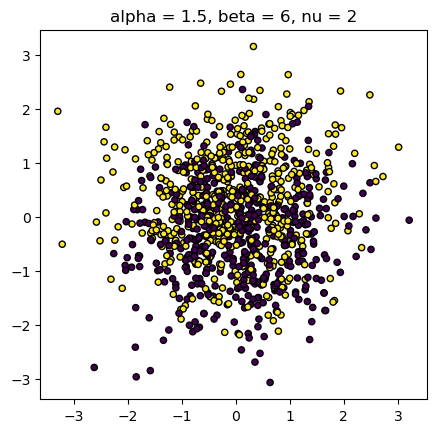

In [6]:
alpha, beta, nu = 1.5, 6, 2
X4, y4 = createData(alpha, beta, nu)
plot_dataset(X4, y4, alpha, beta, nu)

### 1.2

In [7]:
## DBplot from textbook
def DBPlot(m, X, y, nGrid = 100):
    ## find the extent of the features
    ## and add 'padding', here "1" to it.  Adjust as needed!
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            # note: indexing assumes X is a np.array!
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    ## make a dense grid (nGrid x nGrid) in this extent
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    ## Convert two grids into two columns
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    ## predict on the grid
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    ## show the predictions as an semi-transparent image
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    ## add the actual data points on the image
    plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

In [8]:
def tree_eval (alpha, beta, nu, n=1000):
    X, y = createData(alpha, beta, nu, n)
    Xt, Xv, yt, yv = train_test_split(X, y, test_size = 0.3, random_state=371)
    
    best_acc = 0
    best_depth = 1
    best_model = None

    print(f"alpha={alpha}, beta={beta}, nu={nu}")
    for depth in range (1, 11):
        m = DecisionTreeClassifier(max_depth = depth)
        m.fit(Xt, yt)
        y_pred = m.predict(Xv)
        acc = accuracy_score(yv, y_pred)
        print(f"    Depth{depth}: val acc = {acc}")
        if acc > best_acc:
            best_acc = acc
            best_depth = depth
            best_model = m
    print(f"Best depth: {best_depth}, Best acc: {best_acc}")
    DBPlot(best_model, X, y)


alpha=0.2, beta=1, nu=0.05
    Depth1: val acc = 0.91
    Depth2: val acc = 0.91
    Depth3: val acc = 0.95
    Depth4: val acc = 0.9333333333333333
    Depth5: val acc = 0.94
    Depth6: val acc = 0.9433333333333334
    Depth7: val acc = 0.9333333333333333
    Depth8: val acc = 0.9433333333333334
    Depth9: val acc = 0.93
    Depth10: val acc = 0.9433333333333334
Best depth: 3, Best acc: 0.95


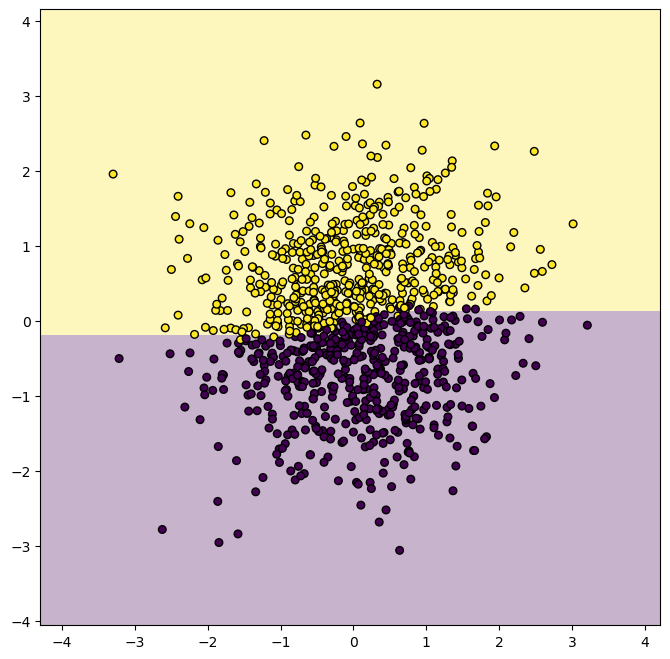

alpha=0.2, beta=1, nu=2
    Depth1: val acc = 0.62
    Depth2: val acc = 0.62
    Depth3: val acc = 0.62
    Depth4: val acc = 0.62
    Depth5: val acc = 0.6133333333333333
    Depth6: val acc = 0.62
    Depth7: val acc = 0.5766666666666667
    Depth8: val acc = 0.62
    Depth9: val acc = 0.62
    Depth10: val acc = 0.6166666666666667
Best depth: 1, Best acc: 0.62


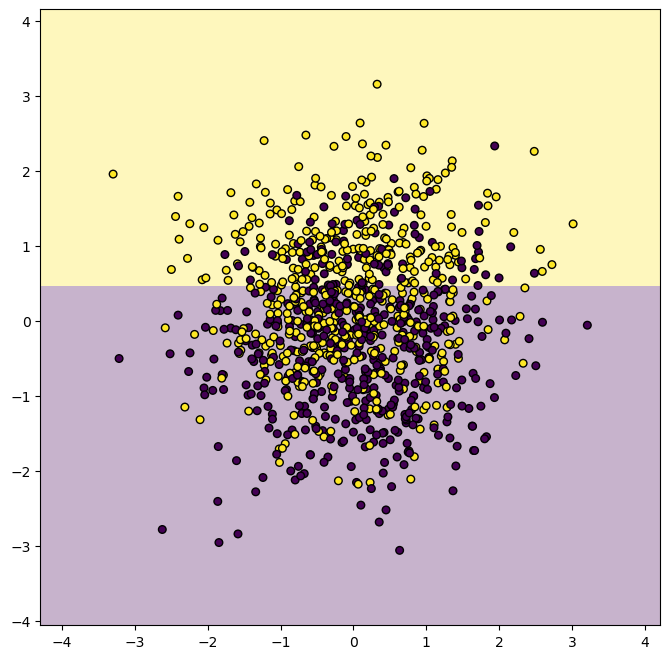

alpha=1.5, beta=6, nu=0.05
    Depth1: val acc = 0.6333333333333333
    Depth2: val acc = 0.6333333333333333
    Depth3: val acc = 0.68
    Depth4: val acc = 0.7633333333333333
    Depth5: val acc = 0.8
    Depth6: val acc = 0.8533333333333334
    Depth7: val acc = 0.88
    Depth8: val acc = 0.89
    Depth9: val acc = 0.9166666666666666
    Depth10: val acc = 0.92
Best depth: 10, Best acc: 0.92


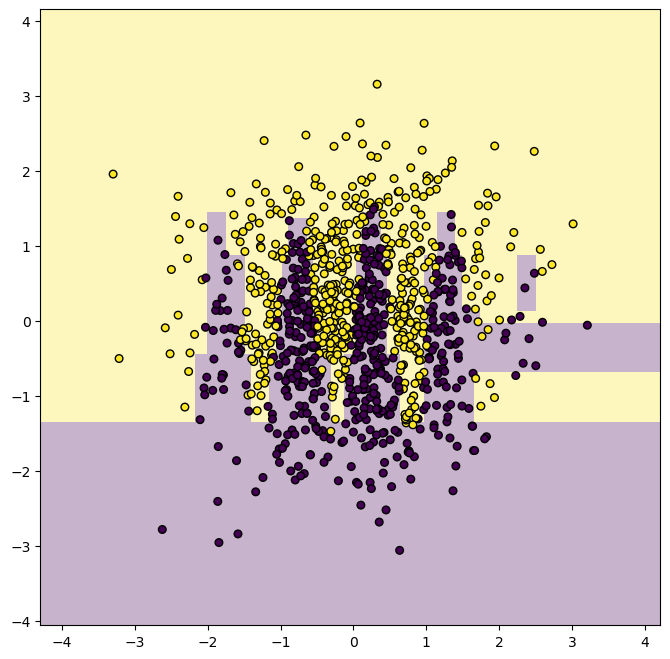

alpha=1.5, beta=6, nu=2
    Depth1: val acc = 0.6066666666666667
    Depth2: val acc = 0.6066666666666667
    Depth3: val acc = 0.57
    Depth4: val acc = 0.6433333333333333
    Depth5: val acc = 0.6033333333333334
    Depth6: val acc = 0.6133333333333333
    Depth7: val acc = 0.64
    Depth8: val acc = 0.63
    Depth9: val acc = 0.6533333333333333
    Depth10: val acc = 0.6233333333333333
Best depth: 9, Best acc: 0.6533333333333333


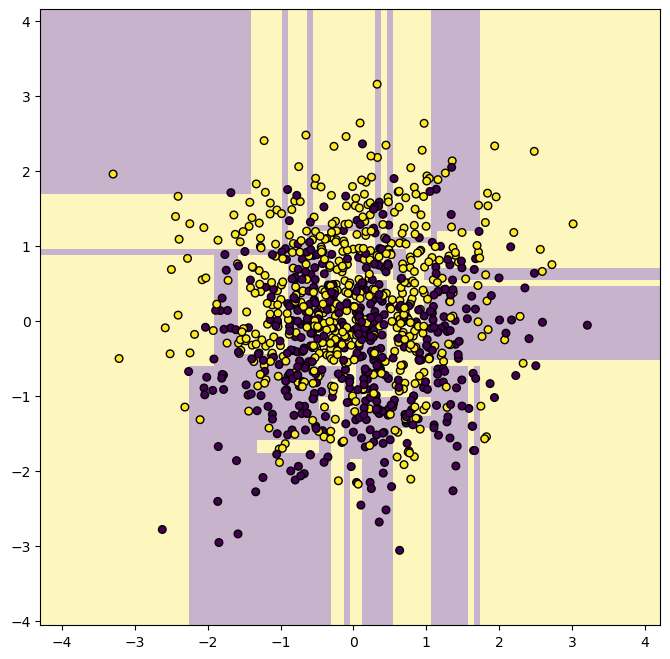

In [9]:
tree_eval(0.2, 1, 0.05)
tree_eval(0.2, 1, 2)
tree_eval(1.5, 6, 0.05)
tree_eval(1.5, 6, 2)

### 1.3

* For the first data with low complexity and low noise, the optimal tree depth seems to be small (3)
* For the second data with low complexity and high noise, the optimal tree depth is still small (1) but the accuracy is significantly less than the first one. Noise are decreasing the validation accuracy. A deeper tree is trying to explain the randomness of data, but cause worse val acc.
* For the third data with high complexity and low noise, the optimal tree depth is relatively high (10). But the accuracy was not bad as depth increase. Increasing the depth kind of capture more of the structrue.
* For the forth data with high complexity and high noise, the optimal tree depth is still relatively high (9). And the accuracy was bad. 

**Summary**, Simple data pattern only need shallow tree. Complex data need deeper tree. Higher noise decrease the predictive power.

## 2

### 2.1

#### 2.1.1

In [32]:
tw = pd.read_csv("tw-bankruptcy.csv.bz2")
# tw.head()
print(tw.isna().sum().sum())
print(tw.shape)

0
(6819, 96)


The data looks generally good. It has 6819 rows and 96 columns

#### 2.1.2

In [11]:
print(tw.dtypes.unique())

[dtype('int64') dtype('float64')]


All data types are either int or float. There are not non-numeric variables

#### 2.1.3

In [12]:
print(tw.isna().sum().sum())

0


There is no NAs

#### 2.1.4

In [13]:
X = tw.drop(columns=["Bankrupt?"]).values
y = tw["Bankrupt?"].values


#### 2.1.5

In [14]:
Xt, Xv, yt, yv = train_test_split(X, y, test_size= 0.2, random_state=371)

#### 2.1.6

In [15]:
majority = np.bincount(yt).argmax()
## full_like (shape, value)
y_naive_pred = np.full_like(yv, majority)
naive_acc = (y_naive_pred == yv).mean()
print(naive_acc)

0.969208211143695


### 2.2

#### 2.2.1

In [16]:
Xt.shape[1]

95

95 features

#### 2.2.2

Logistic regression would create a 94D hyperplane or space since feature has 95 dimentionality. The boundary would cut the hyperplane into yes bankrupt, or no bankrupt

#### 2.2.3

In [17]:
tw.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


First, there are too many determinant that influence the result. Second, if we can do precise prediction, bank will do it, and stock market will do it, so we will know this business will go bankrupt imediately. Therefore there will be a whole lot uncertainty going on.

#### 2.2.4

In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(Xt, yt)
y_pred = lr.predict(Xv)
acc = accuracy_score(yv, y_pred)
print(acc)

0.9633431085043989


#### 2.2.5

It did a little bit worse than the naive model. But I would say they have similar acc. The performance was great by only seeing the lr model. But the naive model is already good enough.

### 2.3

#### 2.3.1

Decision boundary should some hyper rectangles or hyper planes that in 95 dimensions. It's quite impossible to visualize.

#### 2.3.2

`max_depth` controls the max number of splits from the root to leaf. A small depth may cause underfitting (too simple to capture overall structure) A large depth may have risk of overfitting as tree memoried too much of training data and lose generalization.

#### 2.3.3

In [19]:
depths = list(range(1, 10)) 
train_acc = []
val_acc = []
best_val_acc = 0

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=371)
    dt.fit(Xt, yt)

    train_pred = dt.predict(Xt)
    val_pred = dt.predict(Xv)


    train_acc.append(accuracy_score(yt, train_pred))
    curr_val_acc = accuracy_score(yv, val_pred)
    val_acc.append(curr_val_acc)

    if curr_val_acc > best_val_acc:
        best_val_acc = curr_val_acc

#### 2.3.4

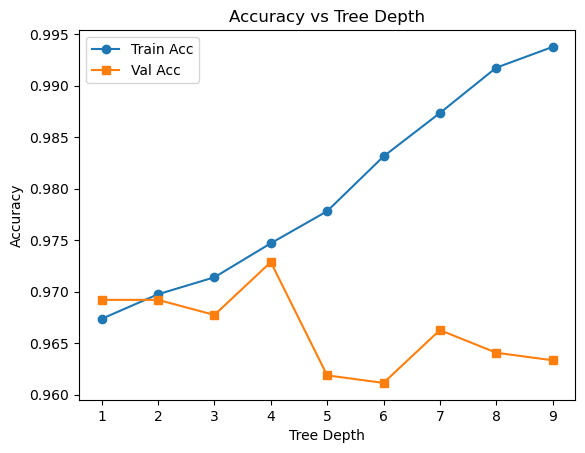

0.9728739002932552


In [20]:
plt.plot(depths, train_acc, label="Train Acc", marker='o')
plt.plot(depths, val_acc, label="Val Acc", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Tree Depth")
plt.legend()
plt.show()
print(best_val_acc)

The best val acc is 0.9728739002932552. Corresponding max depth is 4.

#### 2.3.6

The model starts overfit from depth 4, the optimal depth is 4. Tree work a little bit better than logistic regression.

## 3

### 3.1

In [21]:
skin = pd.read_csv("skin-nonskin.csv.bz2", sep = "\t")

#### 3.1.1.a

In [22]:
skin.shape


(245057, 4)

#### 3.1.1.b

In [23]:
skin.head(5)

,B,G,R,Label
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### 3.1.1.c

In [24]:
skin.isna().sum().sum()

0

There's no NAs

#### 3.1.1.d

In [25]:
skin["Label"].value_counts()

Label
2    194198
1     50859
Name: count, dtype: int64

The possible labels are 1 and 2

### 3.2

#### 3.1.2.a

3 dimension

#### 3.1.2.b

We should expect a sphere or a box shape of feasible skin tones. Since the feasible color should be around the same area.

#### 3.1.2.c

There shouldn't be soo much uncertain since the skin color should be correlated to RGB. So if we have color, we should know the skin color.

#### 3.1.3

In [26]:
X = skin.drop(columns = ["Label"]).values
y = skin.Label.values

#### 3.1.4

In [27]:
Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2, random_state=371)

#### 3.1.5

In [28]:
majority = np.bincount(yt).argmax()
## full_like (shape, value)
y_naive_pred = np.full_like(yv, majority)
naive_acc = (y_naive_pred == yv).mean()
print(naive_acc)

0.7921937484697625


### 3.2

#### 3.2.1

In [29]:
lr = LogisticRegression()
lr.fit(Xt, yt)
y_pred = lr.predict(Xv)
acc = accuracy_score(yv, y_pred)
print(acc)

0.9188158002121929


#### 3.2.2

Logistic regression model perform much better than naive model. The naive model has accuracy 0.79 and logistic regression gets 0.92.

#### 3.2.3

The decision boundary for logistic regression model should look like a plane since we have a 3-dimensional feature space.

### 3.3

#### 3.3.1

The decision boundary will look like boxes or cubes. Since we are not in 3-D space.

#### 3.3.2

In [30]:
depths = list(range(1, 100, 5)) 
train_acc = []
val_acc = []
best_val_acc = 0
max_depth = 0

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=371)
    dt.fit(Xt, yt)

    train_pred = dt.predict(Xt)
    val_pred = dt.predict(Xv)

    train_acc.append(accuracy_score(yt, train_pred))
    curr_val_acc = accuracy_score(yv, val_pred)
    val_acc.append(curr_val_acc)

    if curr_val_acc > best_val_acc:
        best_val_acc = curr_val_acc
        max_depth = d

#### 3.3.3

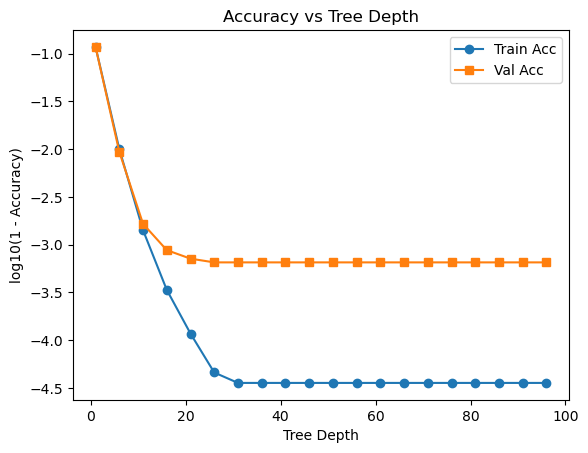

Best val acc: 0.9993470986697135
Max Depth: 26


In [31]:
plt.plot(depths, np.log10(1 - np.array(train_acc)), label="Train Acc", marker='o')
plt.plot(depths, np.log10(1 - np.array(val_acc)), label="Val Acc", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("log10(1 - Accuracy)")
plt.title("Accuracy vs Tree Depth")
plt.legend()
plt.show()

print("Best val acc:", best_val_acc)
print("Max Depth:", max_depth)


#### 3.3.4

The best validation I got was 0.9993470986697135 and the max depth was 26.

#### 3.3.5

I do see overfitting going on. As depth increase, train acc kept increase, but val acc starts to flatten start at depth 26. The model behave like this because the model is learning to much about training data and stop generalization. Therefore the optimal depth should be 26 with corresponding val acc 0.9993470986697135. Is does perform better than logistic regression.

#### 3.3.6

Bankruptcy data has small sample size and noisy features, therefore the model can't capture a strong pattern. As tree goes deeper it start memorizing random noise and decrease val acc. Skin data has relatively large sample size and decision boundary is well structured due to the nature of human skin color. Human skin should be clusterd in couple regions in RGB space. There shouldn't be a lot of noise with assumption that the data labeling is good.